# Comparisions for all work done till now

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sb

## Now let's check for the Tags analysis we did

### Task: Tag Analysis
<b>Here we have trained 2 model</b>
* One with top 5500 important tags and only with 100K datapoints.
* Second one with 500 tags and with 3 times more weight to title. Because title contains more information about question.

In [3]:
# We get the report of our analysis
tags_5500 = pd.read_csv("./Classification reports/SGD_5500tags_analysis_report.csv")
tags_500_title = pd.read_csv("./Classification reports/SGD_500tags_analysis_report.csv")

In [7]:
# Selecting average micro f1 score from report
tags_5500_avg_values = tags_5500["f1-score"].iloc[5500]
tags_500_title_avg_values = tags_500_title["f1-score"].iloc[500]

Text(0.5, 1.0, 'Micro F1 Scores between both models')

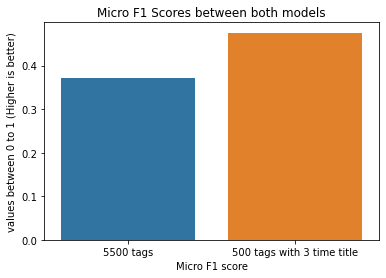

In [21]:
# Now plot then to get better understanding 
y=[tags_5500_avg_values,tags_500_title_avg_values]
sb.barplot(["5500 tags","500 tags with 3 time title"],y)
plt.xlabel("Micro F1 score")
plt.ylabel("values between 0 to 1 (Higher is better)")
plt.title("Micro F1 Scores between both models")

<b>Now let's look at precision and recall value how they are changing</b>

In [22]:
tags_5500.head()

,Unnamed: 0,precision,recall,f1-score,support
0,0,0.632075,0.246173,0.354341,1633.0
1,1,0.777778,0.456317,0.575180,1488.0
2,2,0.832787,0.564444,0.672848,1350.0
3,3,0.760837,0.407526,0.530761,1249.0
4,4,0.937041,0.766524,0.843248,1165.0


In [23]:
tags_500_title.head()

,Unnamed: 0,precision,recall,f1-score,support
0,0,0.623762,0.286550,0.392698,1539.0
1,1,0.811392,0.469597,0.594896,1365.0
2,2,0.846517,0.531111,0.652708,1350.0
3,3,0.777018,0.439628,0.561542,1292.0
4,4,0.948052,0.778667,0.855051,1125.0


**Observations**
* We can clearly see that our second model with 500 tags and 3 time title is working well.<br>
* And if we look at the precision recall and f1-score then they are also improving in the second approach

**So we will contitnue with this model for our further analysis.**
<br>Now we have finalized our tags and now we need to find best algorithm tocwork with this dataset

## Model Analysis

As we have finalized our tags then next we have to Analyize which algorithm is working well on this dataset. 
* In our main analysis notebook we train model with SGDClassifer with logloss function we get 0.35 micro f1 score. now we are analyizing with other algorithms.

In [9]:
logistic_regression = pd.read_csv("./Classification reports/logisticregression_report.csv",)
logistic_regression_4grams = pd.read_csv("./Classification reports/logisticregression_4grams_report.csv")
linear_svm = pd.read_csv("./Classification reports/linear_svm_report.csv")
sgd_logloss = pd.read_csv("./Classification reports/SGD_500tags_analysis_report.csv")

In [11]:
log_reg = logistic_regression["f1-score"].iloc[500]
log_reg_4gram = logistic_regression_4grams["f1-score"].iloc[500]
lin_svm = linear_svm["f1-score"].iloc[500]
sgd_log = sgd_logloss["f1-score"].iloc[500]

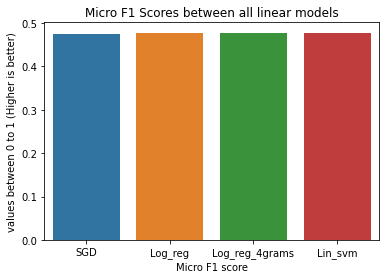


 [0.4756182706794546, 0.4773865672187489, 0.4772299310773506, 0.4765095502156501]


In [17]:
# Now plot then to get better understanding 
y=[sgd_log,log_reg,log_reg_4gram,lin_svm]
sb.barplot(["SGD","Log_reg","Log_reg_4grams","Lin_svm"],y)
plt.xlabel("Micro F1 score")
plt.ylabel("values between 0 to 1 (Higher is better)")
plt.title("Micro F1 Scores between all linear models")
plt.show()
print("\n",y)

In [21]:
logistic_regression.head()

,precision,recall,f1-score,support
0,0.638498,0.265107,0.374656,1539.0
1,0.813433,0.479121,0.603043,1365.0
2,0.847418,0.534815,0.655767,1350.0
3,0.772789,0.439628,0.560434,1292.0
4,0.947883,0.776000,0.853372,1125.0


In [22]:
logistic_regression_4grams.head()

,precision,recall,f1-score,support
0,0.640063,0.265757,0.375574,1539.0
1,0.813433,0.479121,0.603043,1365.0
2,0.847418,0.534815,0.655767,1350.0
3,0.774590,0.438854,0.560277,1292.0
4,0.947883,0.776000,0.853372,1125.0


In [23]:
linear_svm.head()

,precision,recall,f1-score,support
0,0.686475,0.217674,0.330538,1539.0
1,0.824308,0.501832,0.623862,1365.0
2,0.855367,0.560741,0.677405,1350.0
3,0.815549,0.414087,0.549281,1292.0
4,0.952479,0.819556,0.881032,1125.0


In [24]:
sgd_logloss.head()

,precision,recall,f1-score,support
0,0.623762,0.286550,0.392698,1539.0
1,0.811392,0.469597,0.594896,1365.0
2,0.846517,0.531111,0.652708,1350.0
3,0.777018,0.439628,0.561542,1292.0
4,0.948052,0.778667,0.855051,1125.0


**Observation**
* All models are giving approx same values so we are going with logistic regression because it takes less time to conver and with more accuracy.

## Hyper parameter Tuning with GridsearchCV

In [19]:
hp_tuning = pd.read_csv("./Model classification reports/hyperparameter_tunning_scores.csv")

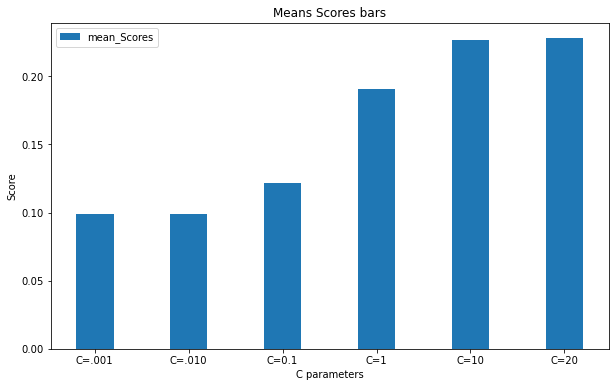

In [25]:
plt.figure(figsize=(10,6))
X = ['C=.001','C=.010',"C=0.1",'C=1','C=10','C=20']
X_axis = np.arange(len(X))
plt.bar(X_axis, list(hp_tuning["means"]), 0.4, label = 'mean_Scores')
plt.xticks(X_axis, X)
plt.xlabel("C parameters")
plt.ylabel("Score")
plt.title("Means Scores bars")
plt.legend()
plt.show()

**Observations**
* c=20 is giving best results so we will continue with c=20

# Now we are done with the analysis now lets build final model

Link of that final Notebook is: 